In [257]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_predict


In [258]:
df = pd.read_excel(r'C:\Users\Asus\Desktop\datasets\ANZ synthesised transaction dataset (1).xlsx')
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [259]:
df['customer_id'].nunique()

100

In [260]:
data = df.groupby(['customer_id']).mean().reset_index()
data.head()

,customer_id,card_present_flag,merchant_code,balance,age,amount
0,CUS-1005756958,0.812500,0.0,2275.852055,53,222.862603
1,CUS-1117979751,0.826923,0.0,9829.929000,21,339.843700
2,CUS-1140341822,0.815385,0.0,5699.212250,28,212.632500
3,CUS-1147642491,0.750000,0.0,9032.841186,34,245.600169
4,CUS-1196156254,0.785276,0.0,22272.433755,34,147.145796


### Finding out the mean salary

In [261]:
print(df['txn_description'].unique())

['POS' 'SALES-POS' 'PAYMENT' 'INTER BANK' 'PAY/SALARY' 'PHONE BANK']


In [262]:
salary = df[df['txn_description']=='PAY/SALARY'].groupby('customer_id').mean()
salary.head()

,card_present_flag,merchant_code,balance,age,amount
customer_id,,,,,
CUS-1005756958,NaN,0.0,4718.665385,53,970.47
CUS-1117979751,NaN,0.0,11957.202857,21,3578.65
CUS-1140341822,NaN,0.0,5841.720000,28,1916.51
CUS-1147642491,NaN,0.0,8813.467692,34,1711.39
CUS-1196156254,NaN,0.0,23845.717143,34,3903.73


In [263]:
salaries = []
for customer_id in df['customer_id']:
    salaries.append(int(salary.loc[customer_id]["amount"]))
df['annual_salary'] = salaries

In [264]:
cust_df = df.groupby("customer_id").mean()
cust_df.drop("annual_salary", axis = 1)

,card_present_flag,merchant_code,balance,age,amount
customer_id,,,,,
CUS-1005756958,0.812500,0.0,2275.852055,53,222.862603
CUS-1117979751,0.826923,0.0,9829.929000,21,339.843700
CUS-1140341822,0.815385,0.0,5699.212250,28,212.632500
CUS-1147642491,0.750000,0.0,9032.841186,34,245.600169
CUS-1196156254,0.785276,0.0,22272.433755,34,147.145796
...,...,...,...,...,...
CUS-72755508,0.866667,0.0,4497.557069,35,197.213276
CUS-809013380,0.795455,0.0,3756.902903,21,151.694274
CUS-860700529,0.791262,0.0,3462.276009,30,77.681888


### Visualising correlations with Salary

Text(0, 0.5, 'Salary')

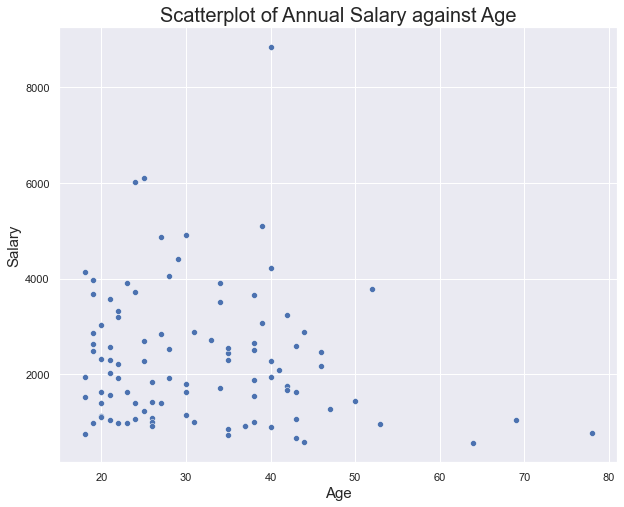

In [265]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(10,8)})
age_salary_graph = sns.scatterplot(x="age", y="annual_salary", data=cust_df)
age_salary_graph.axes.set_title("Scatterplot of Annual Salary against Age",fontsize=20)
age_salary_graph.set_xlabel("Age", fontsize=15)
age_salary_graph.set_ylabel("Salary", fontsize=15)

Text(0, 0.5, 'Salary')

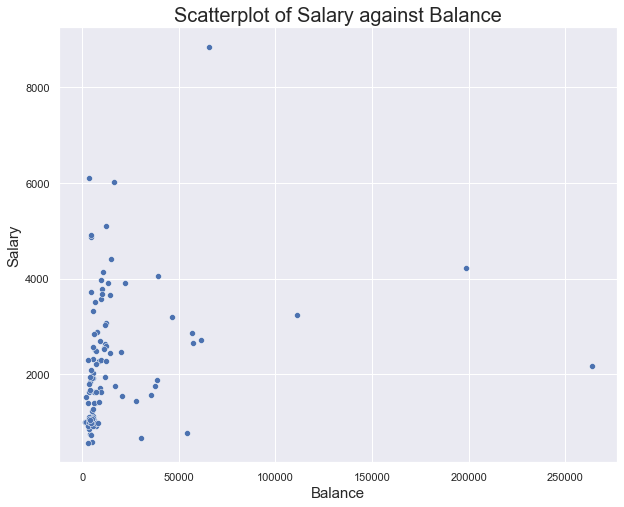

In [266]:
sns.set(rc={'figure.figsize':(10,8)})
age_salary_graph = sns.scatterplot(x="balance", y="annual_salary", data=cust_df)
age_salary_graph.axes.set_title("Scatterplot of Salary against Balance",fontsize=20)
age_salary_graph.set_xlabel("Balance", fontsize=15)
age_salary_graph.set_ylabel("Salary", fontsize=15)

## Visualising regression graphs
### Salary against Age

<AxesSubplot:xlabel='age', ylabel='annual_salary'>

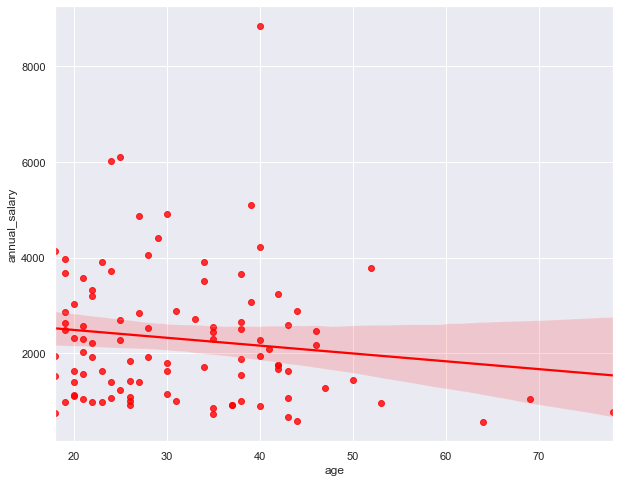

In [267]:
plt.figure(figsize=(10, 8))
sns.regplot(x = "age", y = "annual_salary", data=cust_df, color = 'red')

### Salary against Balance

<AxesSubplot:xlabel='balance', ylabel='annual_salary'>

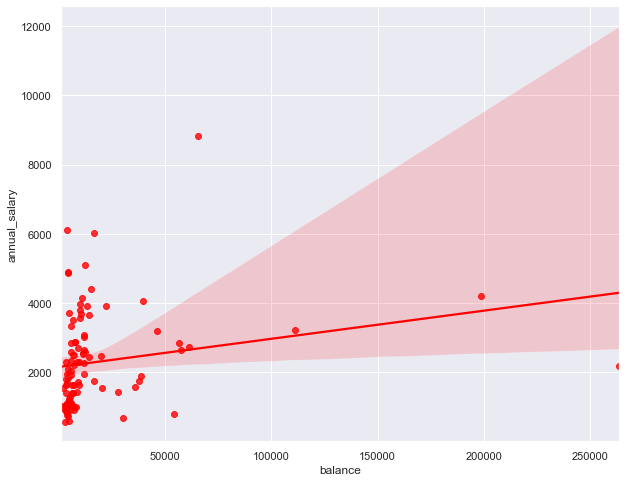

In [268]:
plt.figure(figsize = (10,8))
sns.regplot(x = 'balance', y = 'annual_salary', fit_reg=True, data = cust_df, color = 'red')

## Predictive Analysis

### Linear Regression

In [269]:
X = cust_df.iloc[:,:-1].values
y = cust_df.iloc[:, -1].values.reshape(-1,1)

In [270]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=40)

In [271]:
reg = LinearRegression()

In [272]:
reg.fit(X_train, y_train)
reg.score(X_train, y_train)

0.17003530976614023

In [273]:
y_pred = reg.predict(X_test)

In [274]:
reg.score(X_test,y_test)

0.11021983230883925

In [275]:
np.set_printoptions(precision = 2)
print("Predicted Salary vs Actual Salary:")
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))


Predicted Salary vs Actual Salary:
[[1647.57 1272.  ]
 [2341.76 1757.  ]
 [2356.93 1757.  ]
 [1838.93 2470.  ]
 [2035.81 6107.  ]
 [ 897.48 1043.  ]
 [2381.2  2218.  ]
 [2388.38 1640.  ]
 [1763.85 1541.  ]
 [1962.46 2588.  ]
 [2216.41  990.  ]
 [1991.28 3903.  ]
 [2672.83 1626.  ]
 [3195.68 8835.  ]
 [2694.29 2687.  ]
 [3066.67 2854.  ]
 [2133.69 2538.  ]
 [2678.91 1560.  ]
 [2566.01 2023.  ]
 [2317.78 2572.  ]
 [2301.71 1099.  ]
 [2518.05  916.  ]
 [2118.34  664.  ]
 [2550.13 1880.  ]
 [1938.07 3071.  ]
 [2332.32 2306.  ]
 [2878.37 3195.  ]
 [2267.57 1916.  ]
 [2645.96 1928.  ]
 [1774.77 1681.  ]]


### Decision Tree Regression

In [307]:
df_dec = df[["age", "balance","amount","annual_salary"]]
X1 = df_dec.iloc[:,:-1].values
y1 = df_dec.iloc[:,-1].values.reshape(-1,1)

In [308]:
dt_reg = DecisionTreeRegressor()

In [312]:
X1_train, X1_test, y1_train, y1_test = train_test_split( X1, y1, test_size=0.3, random_state=42)

In [314]:
dt_reg.fit(X1_train, y1_train)
dt_reg.score(X1_train, y1_train)

1.0

In [315]:
dt_reg.predict(X1_test)

array([2320., 1059.,  761., ..., 1138., 2840., 2854.])

In [316]:
dt_reg.score(X1_test, y1_test)

0.6776333838238286

In [317]:
print(dt_reg.predict([[34,3050,240]]))

[3517.]


#### Looks like the Decision Tree Regressor model yields a better result than the Linear Regression model.